# Scrape More with Less Codes

## Meta Info.

* Author: `[Pili Hu](http://hupili.net/)`
* Repo: `[Easy Scraping in Python](https://github.com/hupili/workshop-easy-scraping)`
* Demo: scrapely, python-readability, pyQuery, pandas, httpie, etc

Prerequisites:

* Python3
* `pip install -r reuiqrements.txt`

## FAQ about the Env

Q: What is this webpage you are using?

A: IPython Notebook

In [1]:
# This is the input block -- a full bone Python Shell
print('Look: I will be shown on output block')

Look: I will be shown on output block


### Useful tricks in IPython notebook

In [2]:
import pprint
from IPython.core.display import HTML

In [3]:
HTML('Logo of Initium Lab: <img src="%s">' % 'http://initiumlab.com/favicon-32x32.png')

In [4]:
# Display any HTML easily
my_html = '''
I'm going to show you:
<ul>
    <li> PyReadability </li>
    <li> PyQuery </li>
    <li> ... </li>
</ul>
'''
HTML(my_html)

### A small hack to allow longer output area

In [5]:
%%javascript
//IPython.OutputArea.auto_scroll_threshold = 9999;
IPython.OutputArea.prototype._should_scroll = function(){return false;}

<IPython.core.display.Javascript object>

## Why Scraping?

In [6]:
# I'm going to insert some slides here
from IPython.core.display import Image

### Related works @ Initium Media

Hong Kong Legislative Council: 

https://theinitium.com/article/20150812-hongkong-legcoanalysis/

http://legco.initiumlab.com/matrix

![](assets/legco-matrix.png)


Hong Kong District Council Election:

https://theinitium.com/project/20151012-hk-district-council-elections/

![](assets/dc1.png)

https://theinitium.com/project/20151019-hk-district-council-elections-2/

![](assets/dc2.png)

https://theinitium.com/project/20151029-hk-district-council-elections-3/

![](assets/dc3.png)

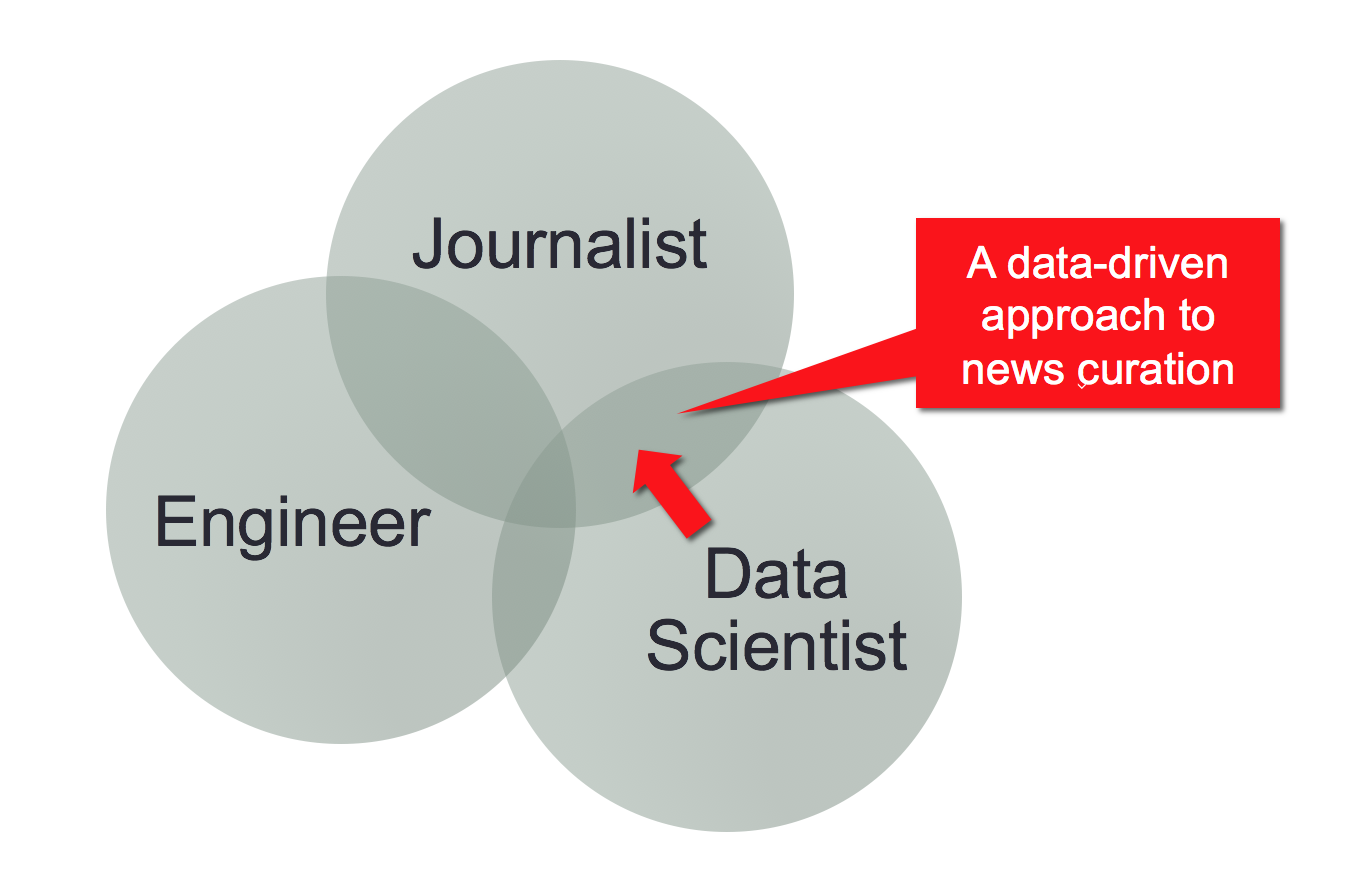

In [7]:
Image('assets/venn-skillset.png')

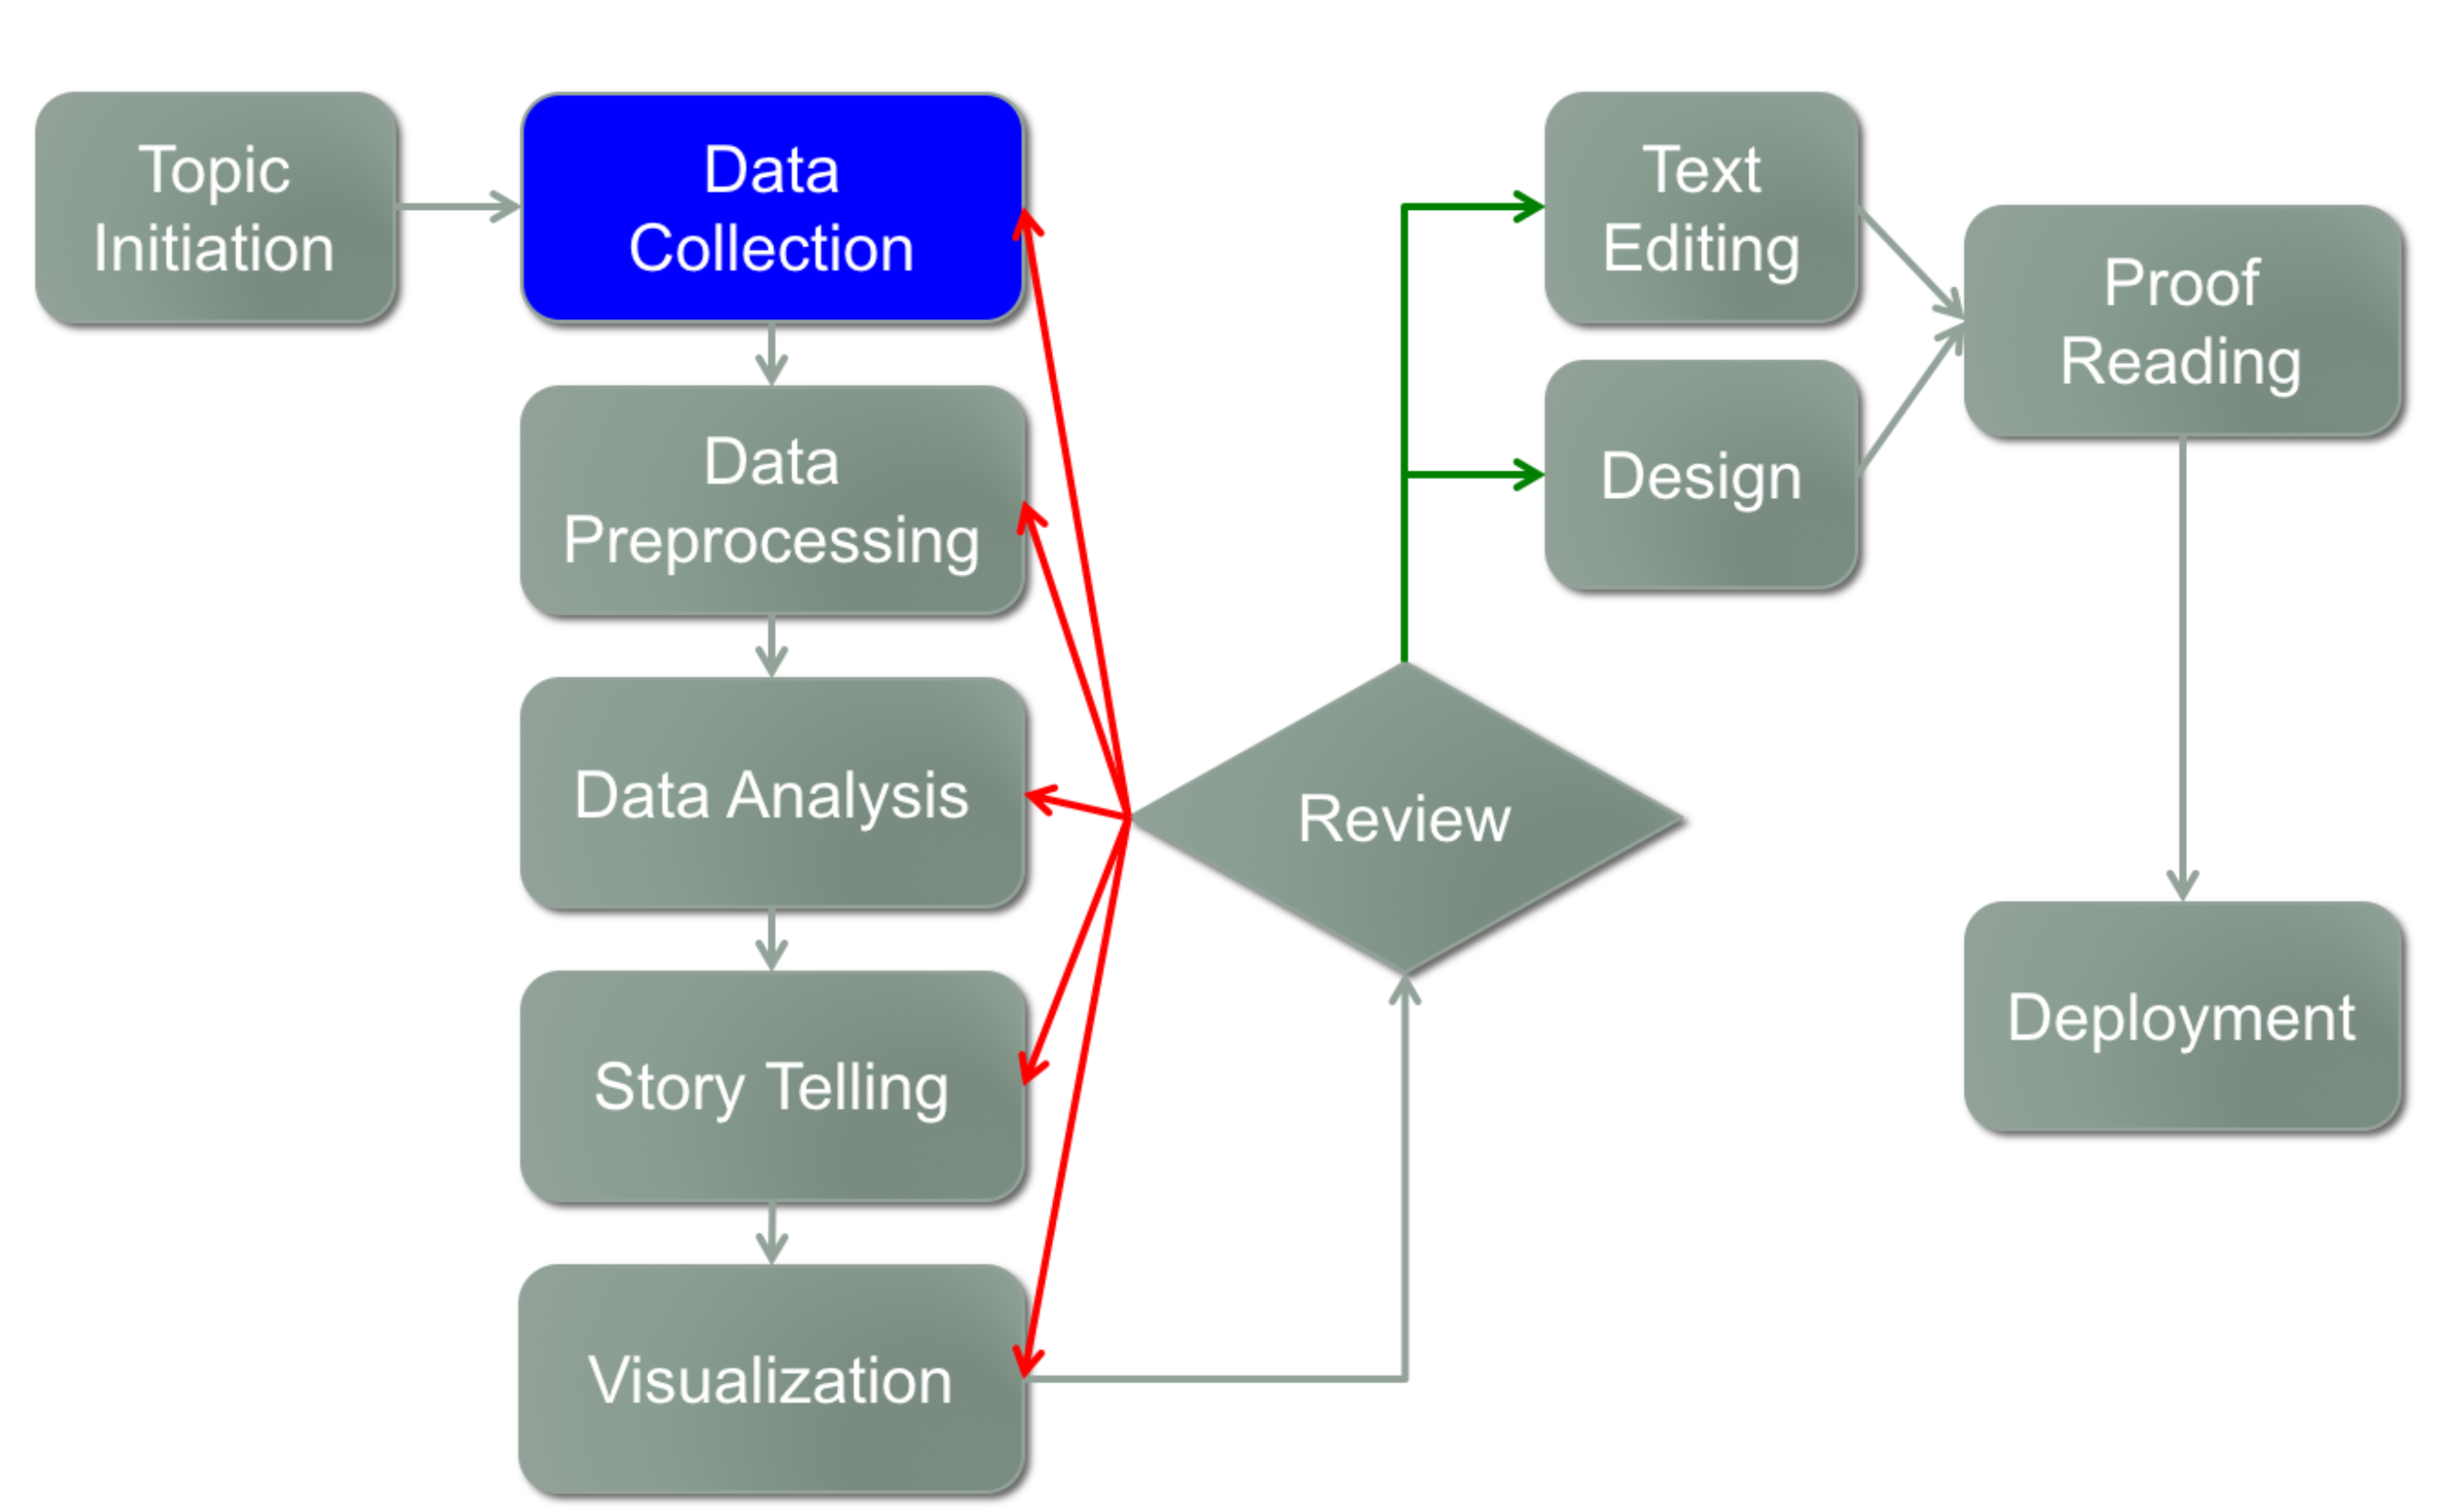

In [8]:
Image('assets/workflow-highlight-data-collection.png')

### About collecting data

* Open Data (easy to find; machine readable; free to use) -- Good.
* **Public data (but not "open data") -- Needs scraping**
* Private data -- an issue of manpower
   * Inputing
   * Labeling

screenshot from: https://cerg1.ugc.edu.hk/cergprod/scrrm00541.jsp


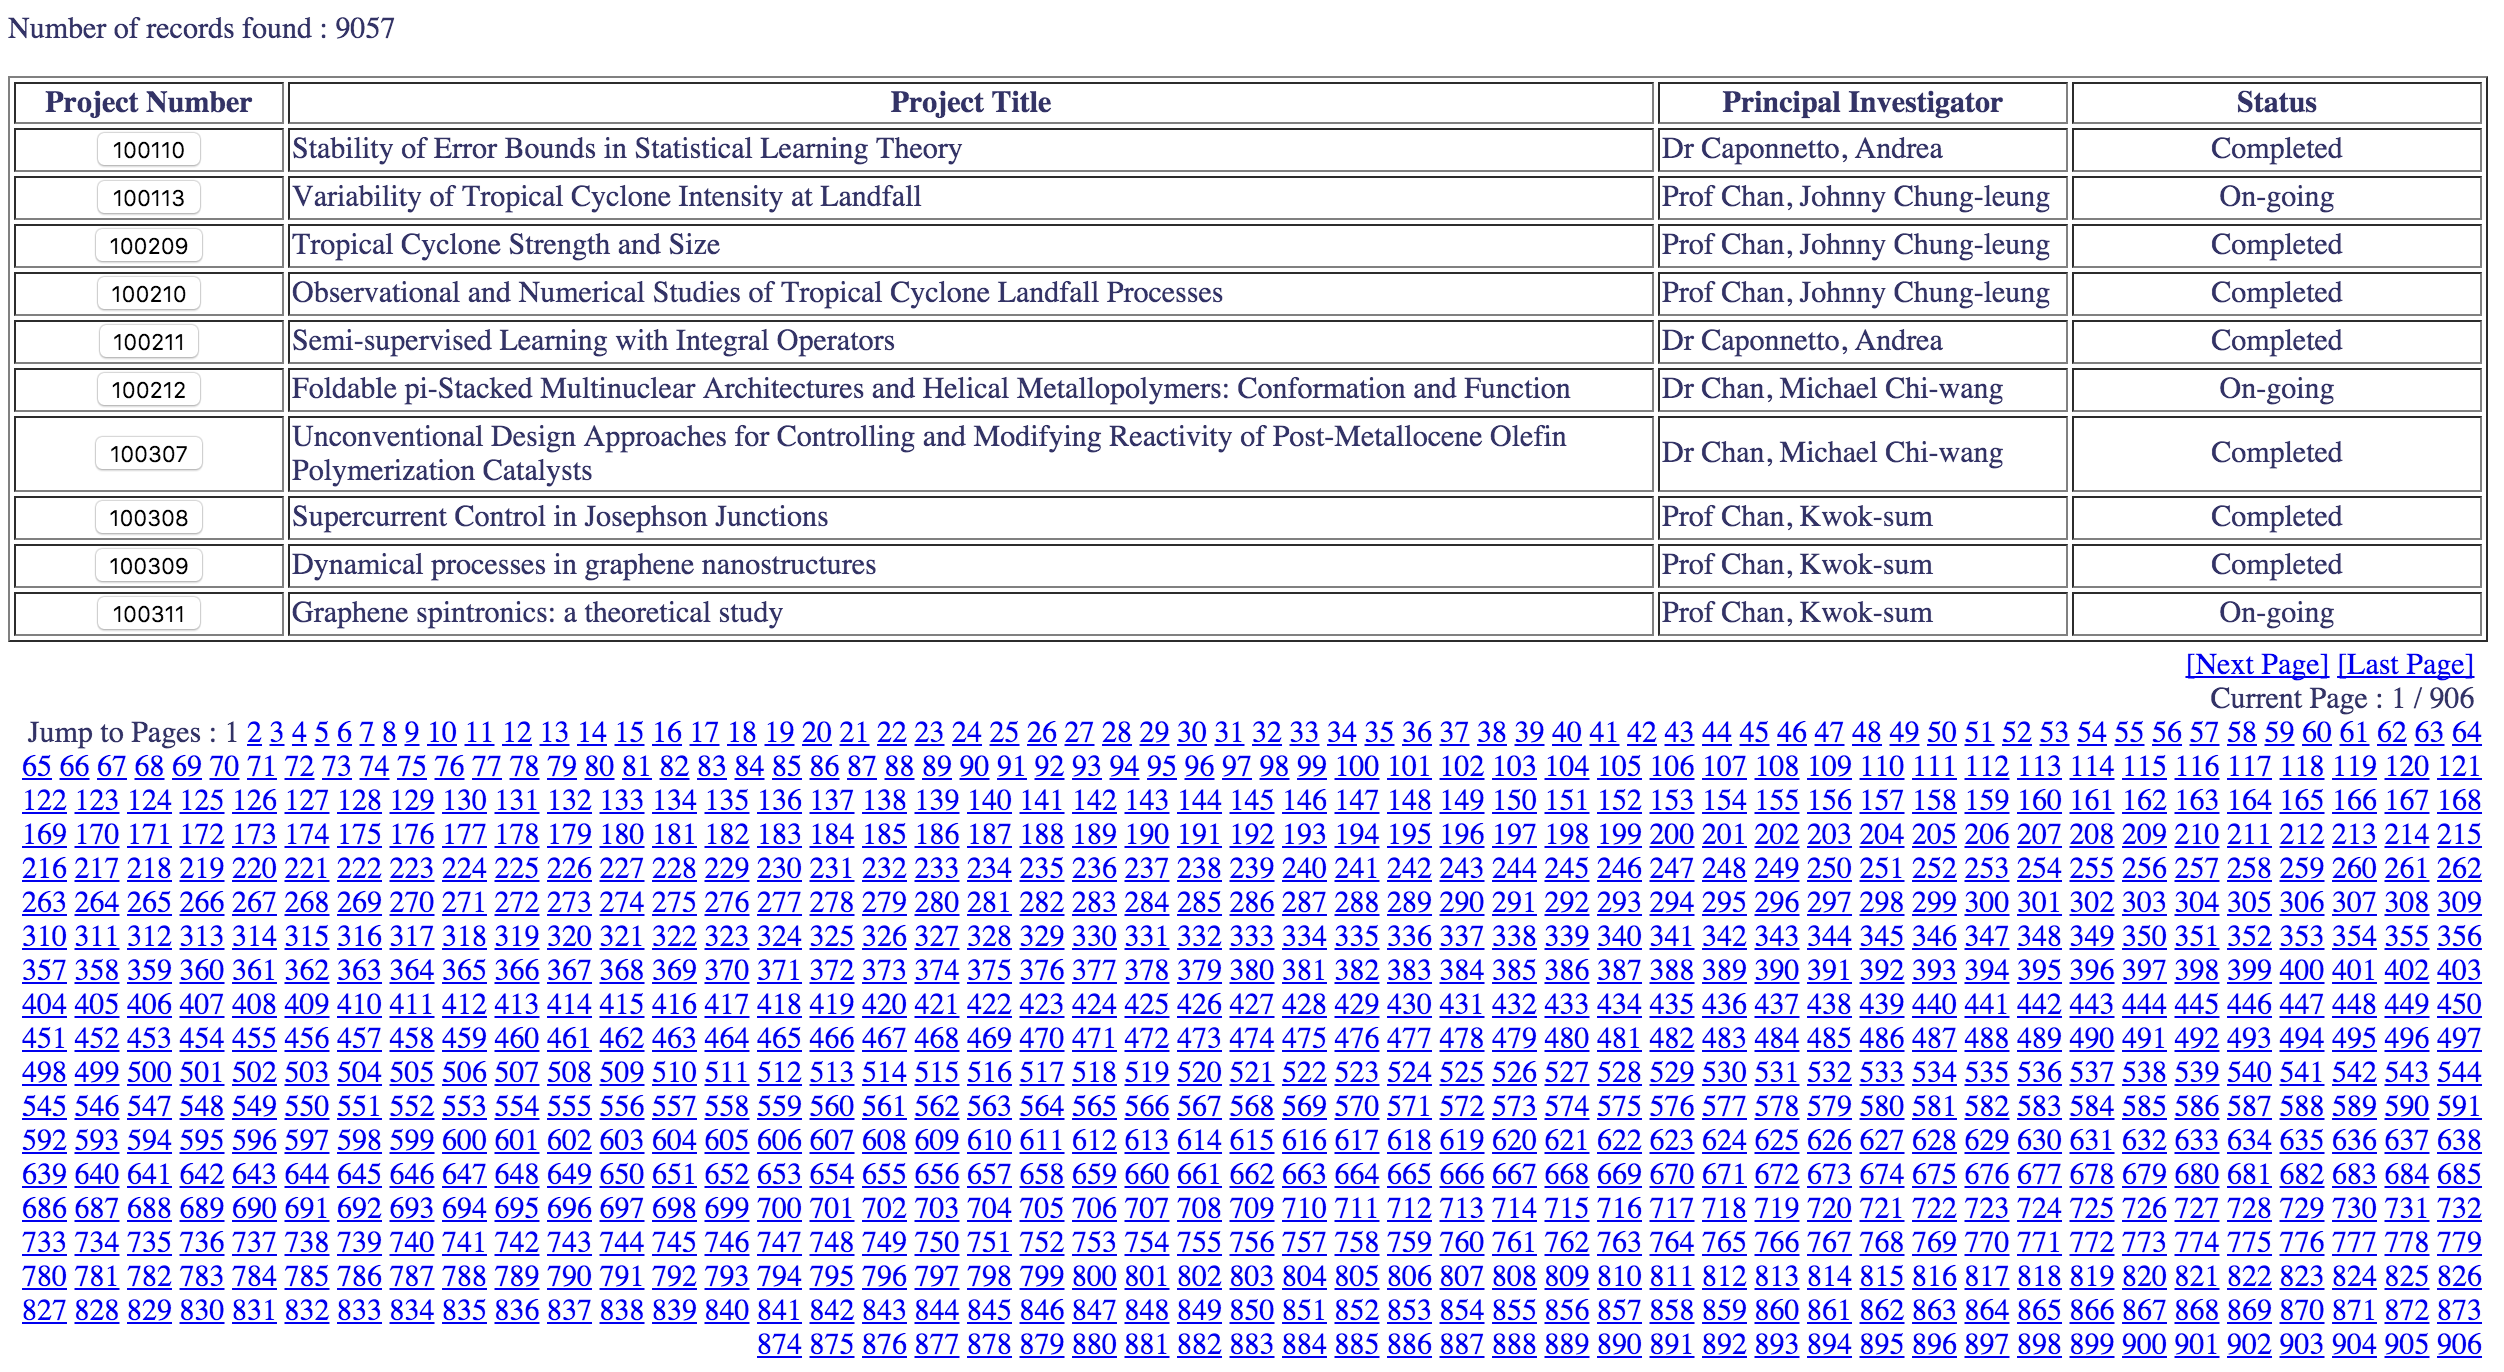

In [9]:
print('screenshot from: https://cerg1.ugc.edu.hk/cergprod/scrrm00541.jsp')
Image('assets/rgc-official-site.png')

### Combine public and private data to get more insights

e.g. # of Hong Kong v.s. Non Hong Kong studies (Social Science)
(Just draft labeling! -- cite the figure at your own risk)


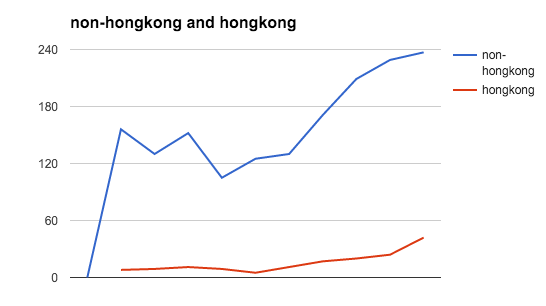

In [10]:
print('e.g. # of Hong Kong v.s. Non Hong Kong studies (Social Science)')
print('(Just draft labeling! -- cite the figure at your own risk)')
Image('assets/hk-non-hk-studies-humanities.png')

## Major Steps of Scraping

1. Download -- Get the raw materials (HTML/ PDF/ XLS)
2. Parse -- Extract useful information from raw materials and put into structured format

### Download -- A lot of command line utilities for quick hacks

In [11]:
%%sh
ls -1

Easy Scraping.html
Easy Scraping.ipynb
README.md
Scrape More with Less Codes.ipynb
assets
hosts
output
path-list.txt
requirements.txt
tmp
venv


In [12]:
%%sh
curl -s 'http://initiumlab.com/' | head -n 8

<!doctype html>
<html class="theme-next use-motion ">
<head>
  

<meta charset="UTF-8"/>
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1"/>


### Download -- Human friendly in Python

In [13]:
import requests
html = requests.get('http://initiumlab.com/').content
html[:500]

b'<!doctype html>\n<html class="theme-next use-motion ">\n<head>\n  \n\n<meta charset="UTF-8"/>\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1"/>\n\n\n<meta http-equiv="Cache-Control" content="no-transform" />\n<meta http-equiv="Cache-Control" content="no-siteapp" />\n\n\n\n\n\n\n  <link rel="stylesheet" type="text/css" href="./vendors/fancybox/source/jquery.fancybox.css?v=2.1.5"/>\n\n\n\n  <link href=\'//fonts.google'

### Parse

Not an easy task, generally:

* Need many trials and erros in practice.
* Could get something you don't want.

In [14]:
%%sh
curl -s 'http://initiumlab.com/' | grep title

  <link rel="alternate" href="./blog/feed.xml" title="Initium Lab" type="application/atom+xml" />
<meta property="og:title" content="Initium Lab">
<meta name="twitter:title" content="Initium Lab">
  <title> Initium Lab </title>
    <div class='subtitle' id="titleWorks">
      <div class='subtitle' id='titleBlogs'>
        <h1 class="post-title" itemprop="name headline">
              <a class="post-title-link" href="./blog/20151025-jackathon-no-5/" itemprop="url">
        </h1> <!-- h1.post-title -->
        <h1 class="post-title" itemprop="name headline">
              <a class="post-title-link" href="./blog/20151015-3d-infographic-user-testing/" itemprop="url">
        </h1> <!-- h1.post-title -->
        <h1 class="post-title" itemprop="name headline">
              <a class="post-title-link" href="./blog/20151005-read-journalism/" itemprop="url">
        </h1> <!-- h1.post-title -->
        <h1 class="post-title" itemprop="name headline">
              <a class="post-title-link" hr

In [15]:
%%sh
curl -s 'http://initiumlab.com/' | grep '<title'

  <title> Initium Lab </title>


### Main problems in scraping

* Download
   * Robot detection
   * Authentication/ Authorisation
   * Transfer error
   * Encoding
   * Incremental Crawling
   * Get the right seed
   * [Y] Scale-out
* Parse (focus on HTML)
   * [Y] Find pattern
      * [Y] Manual
      * [Y] Machine learning
   * [Y] Leverage pattern
   * Deal with anomaly (e.g. broken page)
   
`[Y]` items will be involved in this talk.

For mature project, you usually loop between Download and Parse, e.g. `scrapy` is a widely used framework.

Keywords of this demo:

* Quick
* Dirty Hack

## HTTPie

Human-friendly command tool written in Python

In [16]:
%%sh
http get http://initiumlab.com | head -n 50 | tail -n 10

<meta property="og:type" content="website">
<meta property="og:title" content="Initium Lab">
<meta property="og:url" content="http://initiumlab.com/blog/index.html">
<meta property="og:site_name" content="Initium Lab">
<meta property="og:description" content="The Website of Initium Lab, the exploratory arm of Initium Media">
<meta name="twitter:card" content="summary">
<meta name="twitter:title" content="Initium Lab">
<meta name="twitter:description" content="The Website of Initium Lab, the exploratory arm of Initium Media">




### Command-line (text-interface; stdin/stdout) not good?

No. Nearly seamless integration:

In [17]:
lines = !http get http://initiumlab.com
lines[0:10]

['<!doctype html>',
 '<html class="theme-next use-motion ">',
 '<head>',
 '  ',
 '',
 '<meta charset="UTF-8"/>',
 '<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />',
 '<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1"/>',
 '',
 '']

### The parameters


```
      ':' HTTP headers:
          Referer:http://httpie.org  Cookie:foo=bar  User-Agent:bacon/1.0
      
      '==' URL parameters to be appended to the request URI:
          search==httpie
      
      '=' Data fields to be serialized into a JSON object (with --json, -j)
          or form data (with --form, -f):
          name=HTTPie  language=Python  description='CLI HTTP client'
      
      ':=' Non-string JSON data fields (only with --json, -j):
          awesome:=true  amount:=42  colors:='["red", "green", "blue"]'
      
      '@' Form file fields (only with --form, -f):
          cs@~/Documents/CV.pdf
      
      '=@' A data field like '=', but takes a file path and embeds its content:
           essay=@Documents/essay.txt
      
      ':=@' A raw JSON field like ':=', but takes a file path and embeds its content:
          package:=@./package.json
      
      You can use a backslash to escape a colliding separator in the field name:
          field-name-with\:colon=value
```

### Test requests

In [18]:
%%sh
http get 'http://httpbin.org/get' name==hupili at=='Scrape more with less codes!'

{
  "args": {
    "at": "Scrape more with less codes!", 
    "name": "hupili"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "HTTPie/0.9.2"
  }, 
  "origin": "118.140.67.2", 
  "url": "http://httpbin.org/get?name=hupili&at=Scrape+more+with+less+codes!"
}


In [19]:
%%sh
http post 'http://httpbin.org/post' name==hupili at=='Scrape more with less codes!'

{
  "args": {
    "at": "Scrape more with less codes!", 
    "name": "hupili"
  }, 
  "data": "", 
  "files": {}, 
  "form": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "0", 
    "Host": "httpbin.org", 
    "User-Agent": "HTTPie/0.9.2"
  }, 
  "json": null, 
  "origin": "118.140.67.2", 
  "url": "http://httpbin.org/post?at=Scrape+more+with+less+codes!&name=hupili"
}


**Caveats**: `--ignore-stdin` is required in IPython notebook

Not a problem in command-line env.

Related issues: https://github.com/jkbrzt/httpie/issues/150

In [20]:
%%sh
http --form --ignore-stdin post 'http://httpbin.org/post' name==hupili at='Scrape more with less codes!'

{
  "args": {
    "name": "hupili"
  }, 
  "data": "", 
  "files": {}, 
  "form": {
    "at": "Scrape more with less codes!"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "33", 
    "Content-Type": "application/x-www-form-urlencoded; charset=utf-8", 
    "Host": "httpbin.org", 
    "User-Agent": "HTTPie/0.9.2"
  }, 
  "json": null, 
  "origin": "118.140.67.2", 
  "url": "http://httpbin.org/post?name=hupili"
}


Note: `    "Content-Type": "application/x-www-form-urlencoded; charset=utf-8",`

In [21]:
%%sh
http --form --ignore-stdin post 'http://httpbin.org/post' name=hupili at='Scrape more with less codes!'

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "at": "Scrape more with less codes!", 
    "name": "hupili"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "45", 
    "Content-Type": "application/x-www-form-urlencoded; charset=utf-8", 
    "Host": "httpbin.org", 
    "User-Agent": "HTTPie/0.9.2"
  }, 
  "json": null, 
  "origin": "118.140.67.2", 
  "url": "http://httpbin.org/post"
}


Note: `"Content-Type": "application/json",`

In [22]:
%%sh
http --ignore-stdin post 'http://httpbin.org/post' name=hupili at='Scrape more with less codes!'

{
  "args": {}, 
  "data": "{\"name\": \"hupili\", \"at\": \"Scrape more with less codes!\"}", 
  "files": {}, 
  "form": {}, 
  "headers": {
    "Accept": "application/json", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "56", 
    "Content-Type": "application/json", 
    "Host": "httpbin.org", 
    "User-Agent": "HTTPie/0.9.2"
  }, 
  "json": {
    "at": "Scrape more with less codes!", 
    "name": "hupili"
  }, 
  "origin": "118.140.67.2", 
  "url": "http://httpbin.org/post"
}


### Back to our Hong Kong RGC example

In [23]:
%%sh
http get https://cerg1.ugc.edu.hk/cergprod/scrrm00541.jsp | head -n 10



<HTML>
<HEAD>
<script language="JavaScript" src="validation.js"></script>


<META http-equiv="Content-Type" content="text/html; charset=UTF-8">
<META name="GENERATOR" content="IBM WebSphere Studio">
<META http-equiv="Content-Style-Type" content="text/css">



Exception ignored in: <_io.TextIOWrapper name='<stdout>' mode='w' encoding='UTF-8'>
BrokenPipeError: [Errno 32] Broken pipe


In [24]:
%%sh
http get https://cerg1.ugc.edu.hk/cergprod/scrrm00541.jsp | grep 155

Needs to find out why it doesn't give us the links

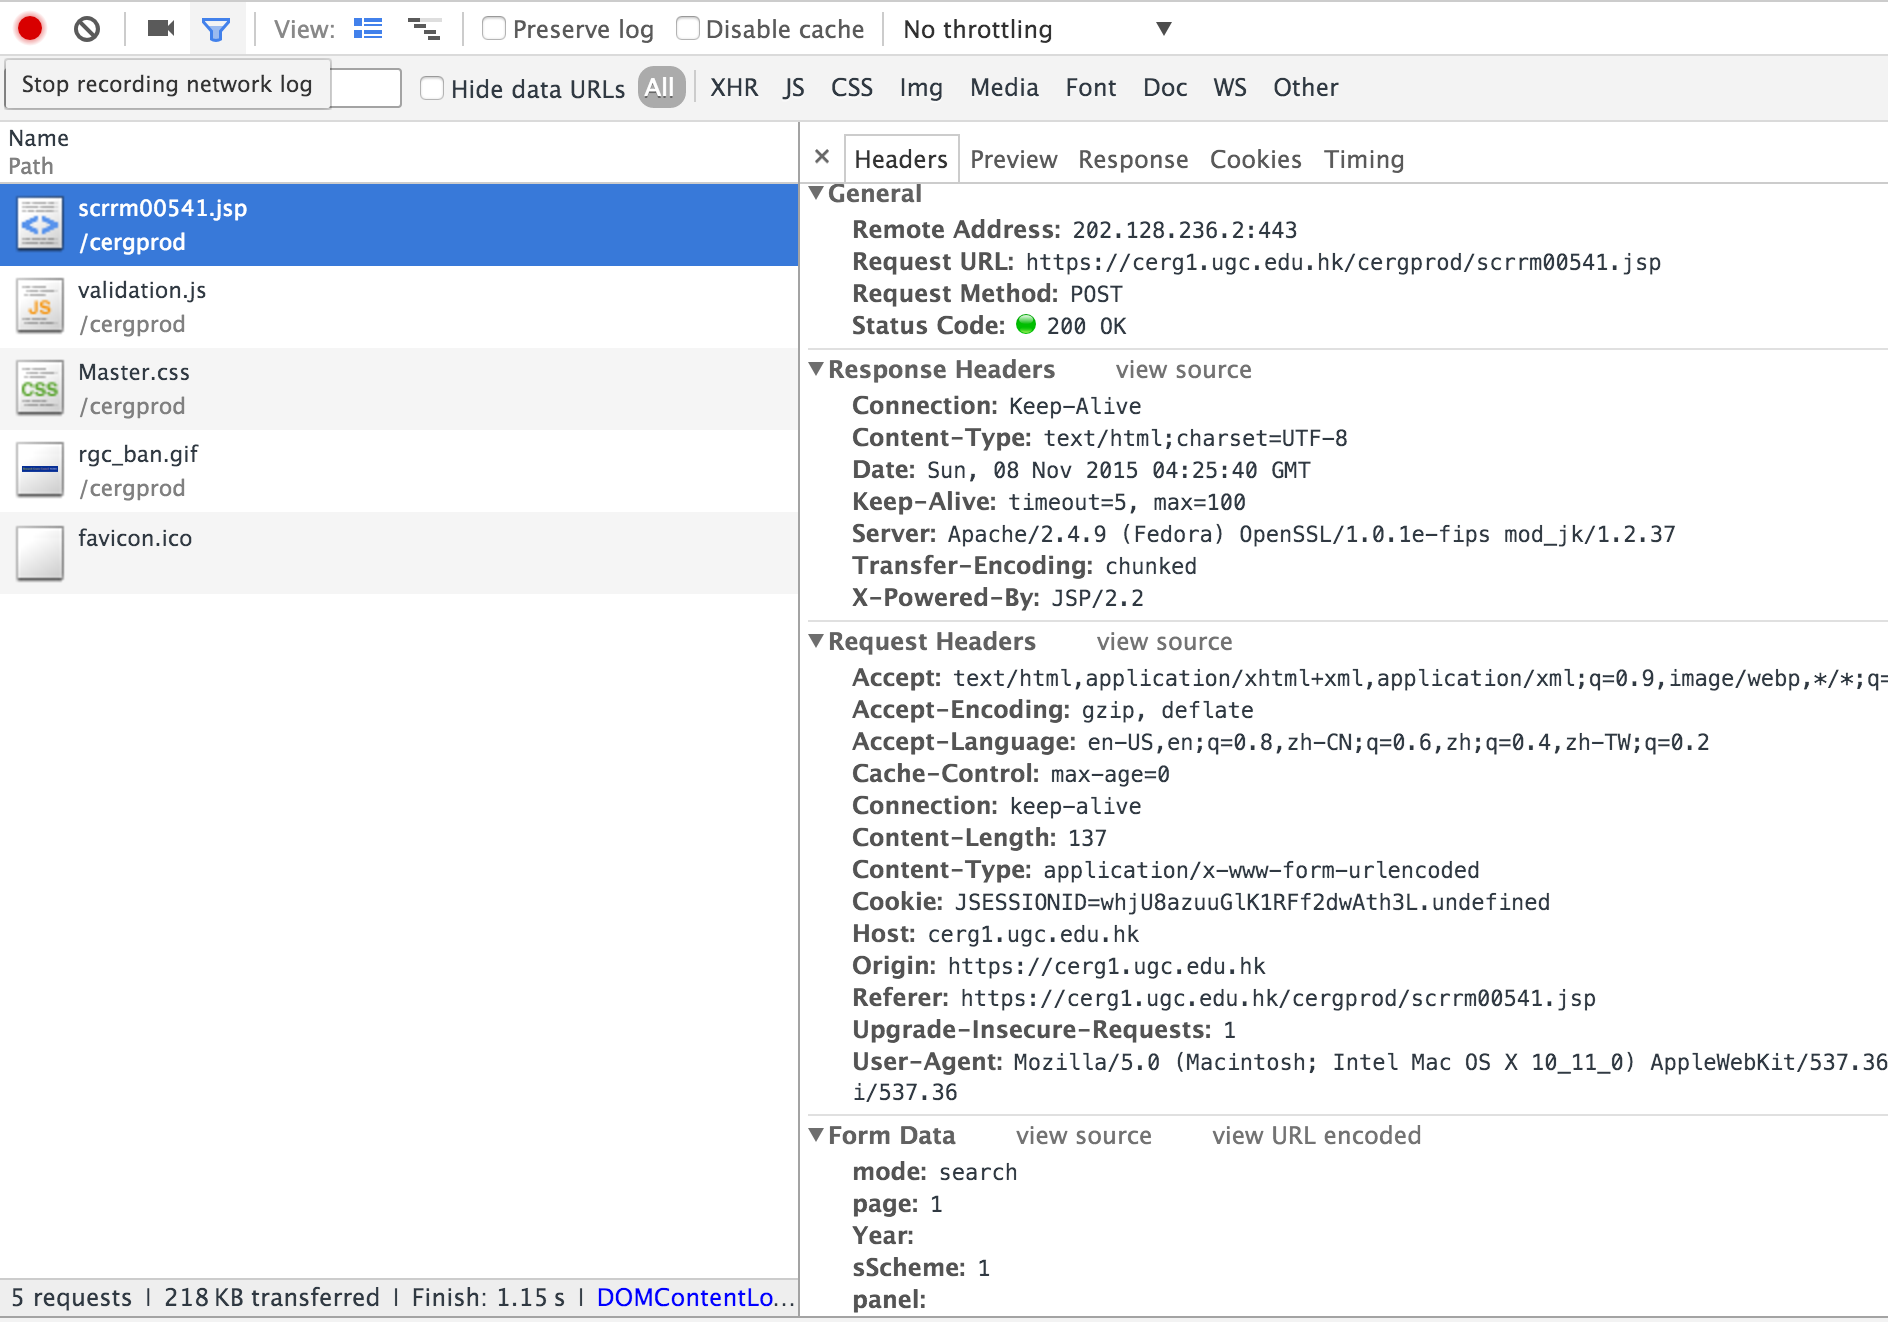

In [25]:
Image('assets/rgc-search-network-trace.png')

Now use HTTPie to easily construct the query

In [26]:
%%sh
http post https://cerg1.ugc.edu.hk/cergprod/scrrm00541.jsp | grep 155

In [27]:
%%sh
http --ignore-stdin --form post 'https://cerg1.ugc.edu.hk/cergprod/scrrm00541.jsp' 'mode=search' 'sScheme=1' | grep 155

	<A HREF="scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=155">155</A>


In [28]:
html_lines = !http --ignore-stdin --form post 'https://cerg1.ugc.edu.hk/cergprod/scrrm00541.jsp' 'mode=search' 'sScheme=1'

In [29]:
html_lines_with_a = list(filter(lambda l: '<A' in l, html_lines))
html_lines_with_a[:5]

['\t<A HREF="scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=2">[Next Page]</A>',
 '\t<A HREF="scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=906">[Last Page]</A>',
 '\t<A HREF="scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=2">2</A>',
 '\t<A HREF="scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=3">3</A>',
 '\t<A HREF="scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=4">4</A>']

### pQuery -- Grep for HTML

A wrap around `pyQuery` -- a Python library that allow you manipulate HTML in jQuery style.

### Try plain grep first

In [30]:
%%sh
http --ignore-stdin --form post 'https://cerg1.ugc.edu.hk/cergprod/scrrm00541.jsp' 'mode=search' 'sScheme=1' \
| grep 155

	<A HREF="scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=155">155</A>


In [31]:
%%sh
http --ignore-stdin --form post 'https://cerg1.ugc.edu.hk/cergprod/scrrm00541.jsp' 'mode=search' 'sScheme=1' \
| grep '<a'

Ignore case

In [32]:
%%sh
http --ignore-stdin --form post 'https://cerg1.ugc.edu.hk/cergprod/scrrm00541.jsp' 'mode=search' 'sScheme=1' \
| grep -i '<a' | head -n 5

	<A HREF="scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=2">[Next Page]</A>
	<A HREF="scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=906">[Last Page]</A>
	<A HREF="scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=2">2</A>
	<A HREF="scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=3">3</A>
	<A HREF="scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=4">4</A>



Exception ignored in: <_io.TextIOWrapper name='<stdout>' mode='w' encoding='UTF-8'>
BrokenPipeError: [Errno 32] Broken pipe


In [33]:
%%sh
http --ignore-stdin --form post 'https://cerg1.ugc.edu.hk/cergprod/scrrm00541.jsp' 'mode=search' 'sScheme=1' \
| grep -i '<a' | grep -o 'HREF=".*"' | head -n 5

HREF="scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=2"
HREF="scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=906"
HREF="scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=2"
HREF="scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=3"
HREF="scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=4"



Exception ignored in: <_io.TextIOWrapper name='<stdout>' mode='w' encoding='UTF-8'>
BrokenPipeError: [Errno 32] Broken pipe


In [34]:
%%sh
http --ignore-stdin --form post 'https://cerg1.ugc.edu.hk/cergprod/scrrm00541.jsp' 'mode=search' 'sScheme=1' \
| grep -i '<a' | grep -o 'HREF=".*"' | cut -d'"' -f2 | head -n 5

scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=2
scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=906
scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=2
scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=3
scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=4



Exception ignored in: <_io.TextIOWrapper name='<stdout>' mode='w' encoding='UTF-8'>
BrokenPipeError: [Errno 32] Broken pipe


### Try pQuery

In [35]:
%%sh
http --ignore-stdin --form post 'https://cerg1.ugc.edu.hk/cergprod/scrrm00541.jsp' 'mode=search' 'sScheme=1' \
| pquery 'a' | head -n 5

{'text': '[Next Page]', 'tag': 'a', 'href': 'scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=2', 'html': '[Next Page]'}
{'text': '[Last Page]', 'tag': 'a', 'href': 'scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=906', 'html': '[Last Page]'}
{'text': '2', 'tag': 'a', 'href': 'scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=2', 'html': '2'}
{'text': '3', 'tag': 'a', 'href': 'scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=3', 'html': '3'}
{'text': '4', 'tag': 'a', 'href': 'scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institutio

Traceback (most recent call last):
  File "/Users/hupili/Dropbox/Desktop-iMAC-initium/project/workshop-easy-scraping/venv/bin/pquery", line 121, in <module>
    array_output(data)
  File "/Users/hupili/Dropbox/Desktop-iMAC-initium/project/workshop-easy-scraping/venv/bin/pquery", line 56, in array_output
    sys.stdout.write(str(i) + '\n')
BrokenPipeError: [Errno 32] Broken pipe
Exception ignored in: <_io.TextIOWrapper name='<stdout>' mode='w' encoding='UTF-8'>
BrokenPipeError: [Errno 32] Broken pipe


In [36]:
%%sh
http --ignore-stdin --form post 'https://cerg1.ugc.edu.hk/cergprod/scrrm00541.jsp' 'mode=search' 'sScheme=1' \
| pquery 'a' -p href | head -n 5

scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=2
scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=906
scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=2
scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=3
scrrm00541.jsp?subject=&panel=&sScheme=1&mode=search&sStatus=&subject=&proj_id=&Old_proj_id=&proj_title=&isname=&ioname=&institution=&Year=&pages=4


Traceback (most recent call last):
  File "/Users/hupili/Dropbox/Desktop-iMAC-initium/project/workshop-easy-scraping/venv/bin/pquery", line 121, in <module>
    array_output(data)
  File "/Users/hupili/Dropbox/Desktop-iMAC-initium/project/workshop-easy-scraping/venv/bin/pquery", line 56, in array_output
    sys.stdout.write(str(i) + '\n')
BrokenPipeError: [Errno 32] Broken pipe
Exception ignored in: <_io.TextIOWrapper name='<stdout>' mode='w' encoding='UTF-8'>
BrokenPipeError: [Errno 32] Broken pipe


In [37]:
%%sh
http --ignore-stdin --form post 'https://cerg1.ugc.edu.hk/cergprod/scrrm00541.jsp' 'mode=search' 'sScheme=1' \
| pquery 'a' -p href | wc -l

907


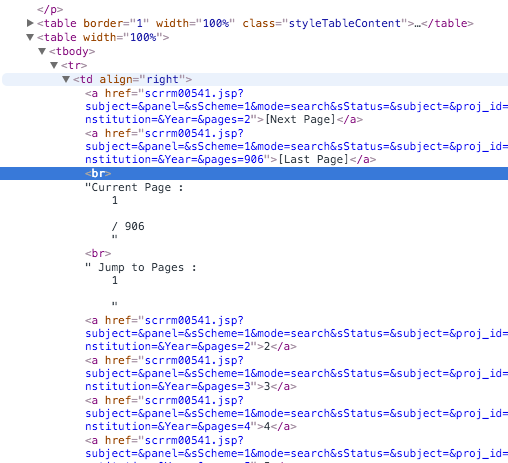

In [38]:
Image('assets/rgc-index-list.png')

In [39]:
%%sh
http --ignore-stdin --form post 'https://cerg1.ugc.edu.hk/cergprod/scrrm00541.jsp' 'mode=search' 'sScheme=1' \
| pquery "table td[align='right'] a" -p href | wc -l

907


### Further read: a case using HTTPie and pQuery

Scrape the info of 60 data science books and visualise their connection:
http://www.kdnuggets.com/2015/09/free-data-science-books.html

* Demo repo: https://github.com/hupili/60-data-science-book-visualisation
* HTTPie: https://github.com/jkbrzt/httpie
* pquery: https://github.com/hupili/pquery (CLI wrapper of PyQuery)

In [40]:
%%sh
http --body 'http://www.kdnuggets.com/2015/09/free-data-science-books.html' |\
pquery '.three_ul li strong a' -f '"{text}",{href}' |\
head -n 8

"An Introduction to Data Science",https://docs.google.com/file/d/0B6iefdnF22XQeVZDSkxjZ0Z5VUE/edit?pli=1
"School of Data Handbook",http://schoolofdata.org/handbook/
"Data Jujitsu: The Art of Turning Data into Product",http://www.oreilly.com/data/free/data-jujitsu.csp
"The Data Science Handbook",http://www.thedatasciencehandbook.com/#get-the-book
"The Data Analytics Handbook",https://www.teamleada.com/handbook
"Data Driven: Creating a Data Culture",http://www.oreilly.com/data/free/data-driven.csp
"Building Data Science Teams",http://www.oreilly.com/data/free/building-data-science-teams.csp
"Understanding the Chief Data Officer",http://www.oreilly.com/data/free/files/understanding-chief-data-officer.pdf


Exception ignored in: <_io.TextIOWrapper name='<stdout>' mode='w' encoding='UTF-8'>
BrokenPipeError: [Errno 32] Broken pipe


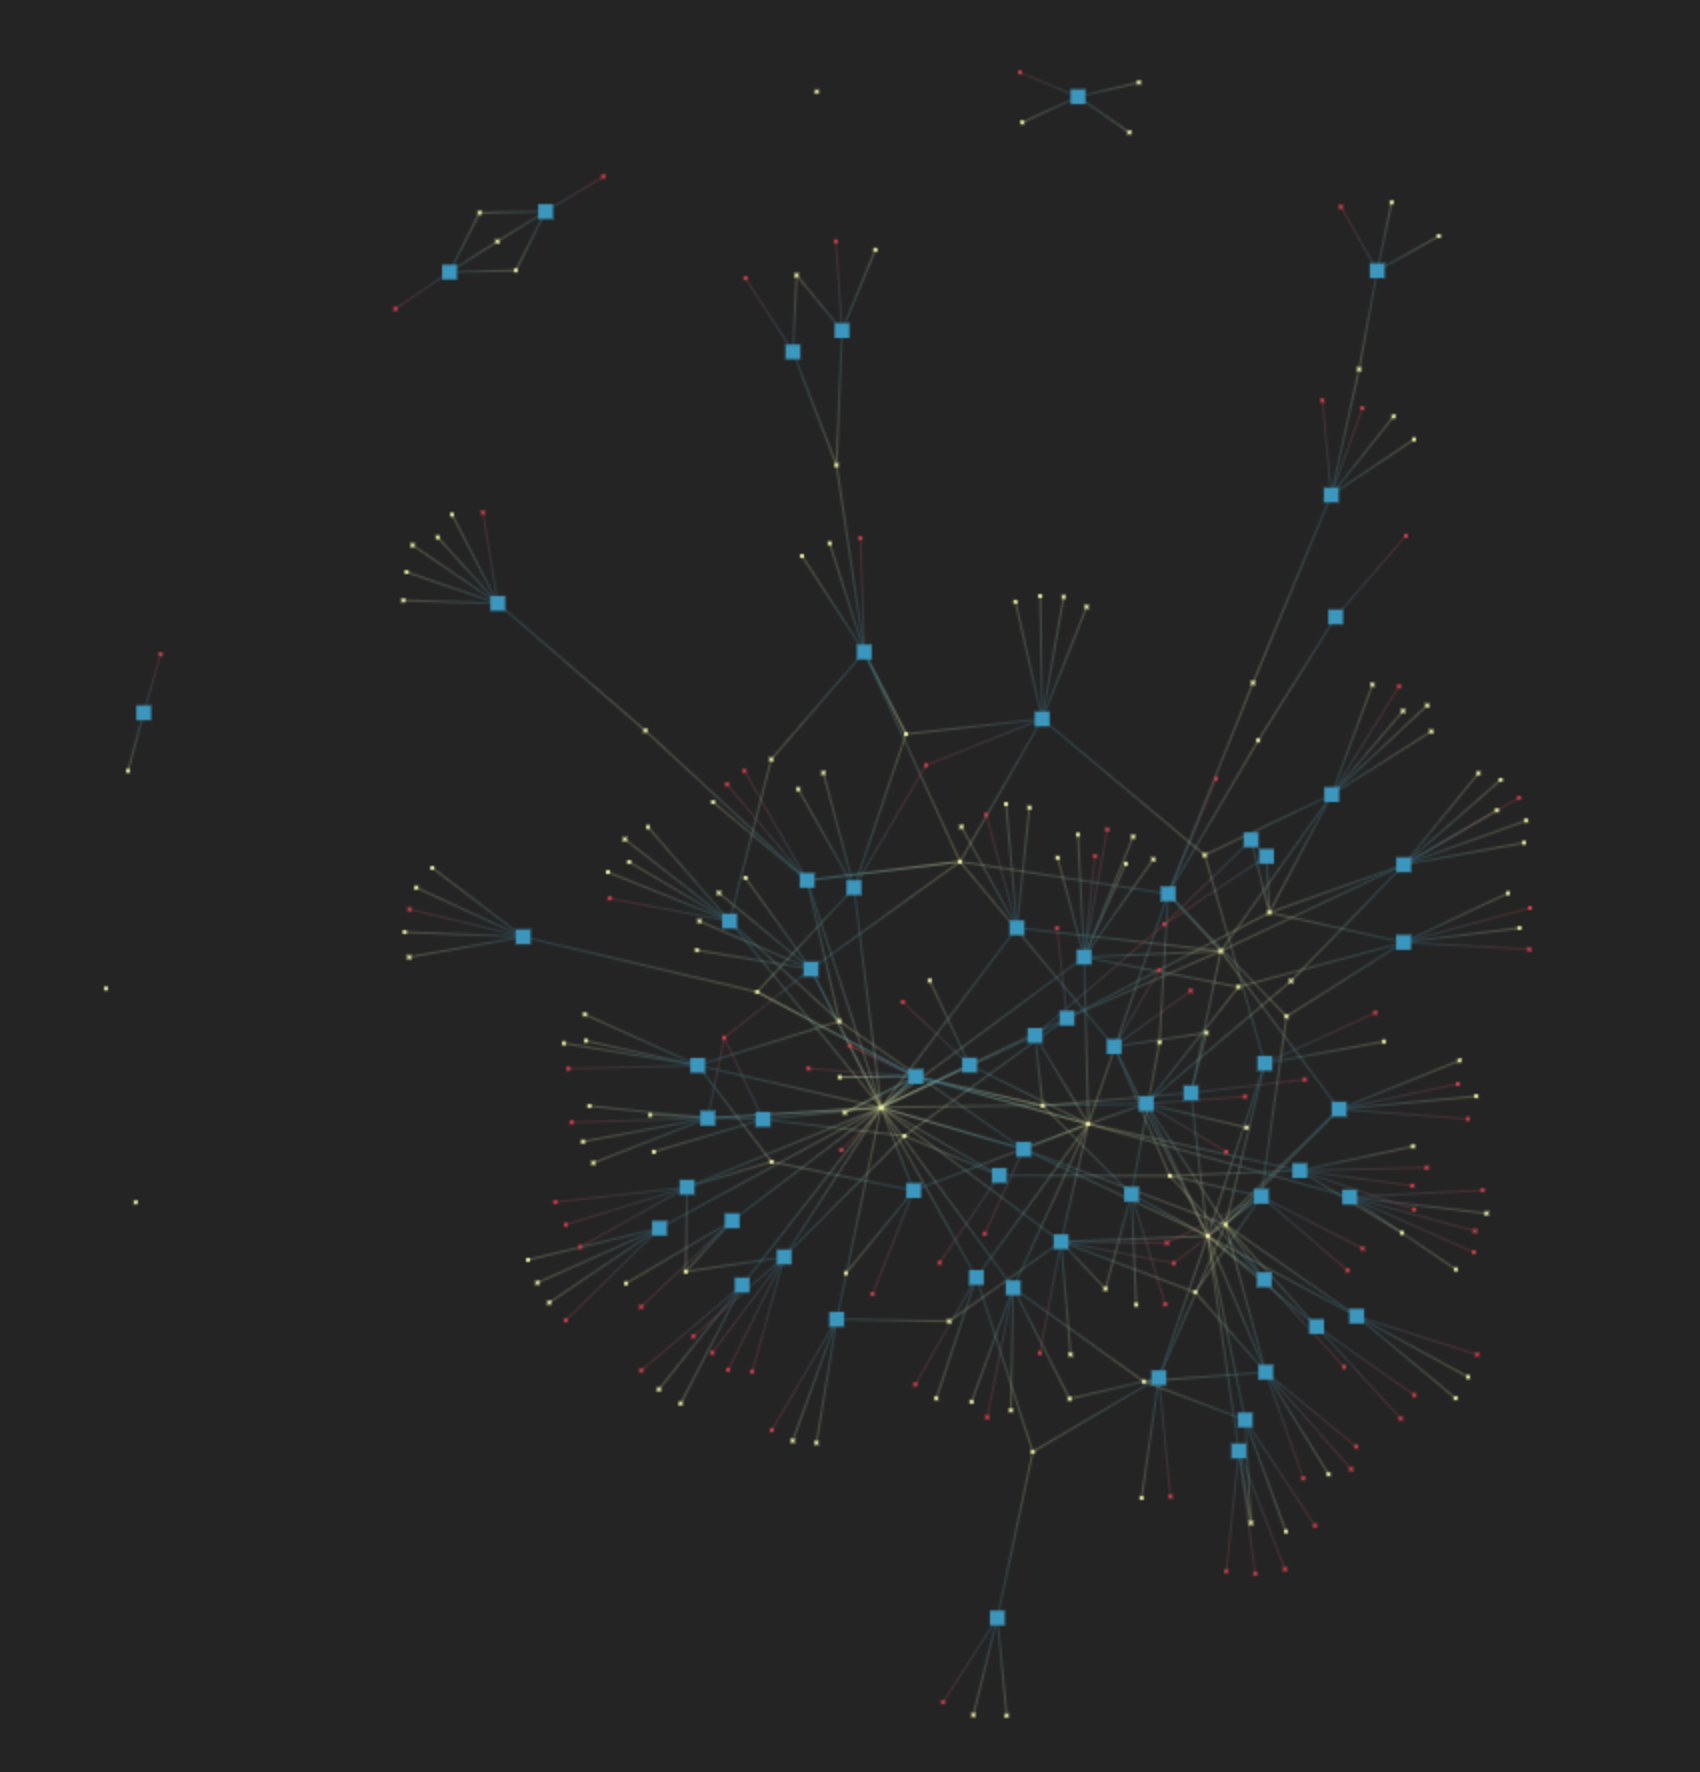

In [41]:
Image('assets/data-science-books-graph.png')

## Scale-out -- all in command-line

### Check the downloaded data

In [42]:
%%sh
http --ignore-stdin --form post 'https://cerg1.ugc.edu.hk/cergprod/scrrm00541.jsp' 'mode=search' 'sScheme=1' \
| pquery "table td[align='right'] a" -p href > path-list.txt

Next, let's download them all

In [43]:
%%sh
tail -n 1 path-list.txt | xargs -I{} http "https://cerg1.ugc.edu.hk/cergprod/{}" \
| pquery 'table.styleTableContent' -p html | head -n 10

      
    <tr class="styleTableHeader">&#13;
       <td nowrap="nowrap" width="10%" align="center"><b>Project Number</b></td>&#13;
       <td nowrap="nowrap" width="50%" align="center"><b>Project Title</b></td>&#13;
       <td nowrap="nowrap" width="15%" align="center"><b>Principal Investigator</b></td>&#13;
       <td nowrap="nowrap" width="15%" align="center"><b>Status</b></td>&#13;
    </tr>    &#13;
<br/>
<br/>
&#13;


Exception ignored in: <_io.TextIOWrapper name='<stdout>' mode='w' encoding='UTF-8'>
BrokenPipeError: [Errno 32] Broken pipe


In [44]:
%%sh
tail -n 1 path-list.txt | xargs -I{} http "https://cerg1.ugc.edu.hk/cergprod/{}" \
| pquery 'table.styleTableContent' -p html | pquery 'td' -p text


	
Revolution, Commercialism and Chineseness: The Reception and Appropriation of the Socialist Opera Films in Captialist-Colonial Hong Kong, 1954-1966
Dr Hui, Kwok Wai

	On-going

	

	
Age Differences in Cognitive Control and Daily Control Strategies and Emotional Experiences: Implications on Physical and Emotional Health
Dr Hou, Wai Kai

	On-going

	

	
The Chinese Healthcare Reform in Provincial Perspective: A Comparative Study of Fujian and Shanxi
Dr He, Jingwei Alex

	On-going

	

	
The identification, abundance and sources of microplastics in the fluvial, littoral and marine environments of Hong Kong
Dr Fok, Lincoln

	On-going

	

	
Decoding the Role and Efficacy of Verbal Imagery in the Teaching and Learning of Singing: Case Studies in Greater China towards a Holistic Approach
Dr Chen, Ti Wei

	On-going

	

	
Linguistic Analysis of Mid-20th Century Hong Kong Cantonese by Constructing an Annotated Spoken Corpus
Dr Chin, Chi On

	On-going

	

	
 Chinese morality: When propriety is 

### Use xargs -P for local multi-processing

In [45]:
%time page_lines = !tail -n 10 path-list.txt | xargs -I{} http "https://cerg1.ugc.edu.hk/cergprod/{}"

CPU times: user 75.6 ms, sys: 47.1 ms, total: 123 ms
Wall time: 9.53 s


In [46]:
%time page_lines = !tail -n 10 path-list.txt | xargs -I{} -P5 http "https://cerg1.ugc.edu.hk/cergprod/{}"

CPU times: user 70.2 ms, sys: 42.8 ms, total: 113 ms
Wall time: 4.41 s


### Other quick parallel execution tools


A) My early dirty work: https://github.com/hupili/Lightweight-Distributing-Toolset

In Perl. 4 years ago. Do not use

-----

B) GNU Parallel: http://www.gnu.org/software/parallel/

Written in Perl. Only need SSH access to remote (or local machine)

Cool, but...

-------

C) PSSH: https://code.google.com/p/parallel-ssh/

* written in Python, good.
* Can brew install, good.


In [47]:
%%file hosts
localhost

Overwriting hosts


In [48]:
%%sh
cat hosts

localhost

In [49]:
%%sh
pssh -h hosts -o output/ 'echo hello PSSH'

[1] 14:10:40 [SUCCESS] localhost


In [50]:
%%sh
ls output/

localhost


In [51]:
%%sh
cat output/localhost

hello PSSH


## Pandas

Easier for tabulared data.


In [52]:
%%sh
tail -n 1 path-list.txt | xargs -I{} http "https://cerg1.ugc.edu.hk/cergprod/{}" \
| pquery 'table.styleTableContent' -p html | head -n 5

      
    <tr class="styleTableHeader">&#13;
       <td nowrap="nowrap" width="10%" align="center"><b>Project Number</b></td>&#13;
       <td nowrap="nowrap" width="50%" align="center"><b>Project Title</b></td>&#13;
       <td nowrap="nowrap" width="15%" align="center"><b>Principal Investigator</b></td>&#13;


Exception ignored in: <_io.TextIOWrapper name='<stdout>' mode='w' encoding='UTF-8'>
BrokenPipeError: [Errno 32] Broken pipe


In [53]:
table_html = !tail -n 1 path-list.txt | xargs -I{} http "https://cerg1.ugc.edu.hk/cergprod/{}" | pquery 'table.styleTableContent' -p html

In [62]:
import pandas as pd
df_projects = pd.read_html('<table>%s</table>' % '\n'.join(table_html))

In [66]:
df_projects[0]

0                                                  1  \
0  Project Number                                      Project Title   
1             NaN  Revolution, Commercialism and Chineseness: The...   
2             NaN  Age Differences in Cognitive Control and Daily...   
3             NaN  The Chinese Healthcare Reform in Provincial Pe...   
4             NaN  The identification, abundance and sources of m...   
5             NaN  Decoding the Role and Efficacy of Verbal Image...   
6             NaN  Linguistic Analysis of Mid-20th Century Hong K...   
7             NaN  Chinese morality: When propriety is part of th...   

                                 2         3  
0           Principal Investigator    Status  
1                 Dr Hui, Kwok Wai  On-going  
2                  Dr Hou, Wai Kai  On-going  
3              Dr He, Jingwei Alex  On-going  
4                  Dr Fok, Lincoln  On-going  
5                  Dr Chen, Ti Wei  On-going  
6                  Dr Chin, Chi On  On-going  
7  Dr Buchtel, Emma Ellen Kathrina  On-going

## Readability

We use a version ported to Python3:
<https://github.com/hyperlinkapp/python-readability>
(already included in the `reuqirements.txt` file)

In [ ]:
from readability.readability import Document
import requests
html = requests.get('http://initiumlab.com/blog/20150922-jackathon3-review/').content
readable_article = Document(html).summary()
readable_title = Document(html).short_title()

In [ ]:
print(readable_article[:1000])

In [ ]:
HTML(readable_article[:1000])

## PyQuery

Let's fix the above URL problems

In [ ]:
import pyquery
r = pyquery.PyQuery(readable_article)
r('p')

In [ ]:
r('video').attr('poster')

In [ ]:
r('video source').attr('src')

In [ ]:
r('video').attr('poster', 'http://initiumlab.com/%s' % r('video').attr('poster'))

In [ ]:
r('video').attr('poster')

In [ ]:
r('video source').attr('src', 'http://initiumlab.com/%s' % r('video source').attr('src'))

In [ ]:
r('video source').attr('src')

In [ ]:
r.html()[:1000]

In [ ]:
%%javascript
//IPython.OutputArea.auto_scroll_threshold = 9999;
IPython.OutputArea.prototype._should_scroll = function(){return false;}

In [ ]:
HTML(r.html()[:1000])

## Scrapely

In [ ]:
from scrapely import Scraper
s = Scraper()

In [ ]:
help(s.train)

In [ ]:
from urllib import parse
def get_localhost_url(url):
    filename = parse.quote_plus(url)
    fullpath = 'tmp/%s' % filename
    html = requests.get(url).content
    open(fullpath, 'wb').write(html)
    return 'http://localhost:8888/files/%s?download=1' % parse.quote_plus(fullpath)

In [ ]:
training_url = 'http://initiumlab.com/blog/20150916-legco-eng/'
training_data = {'title': 'Legco Matrix Brief (English)', 
                 'author': 'Initium Lab', 
                 'date': '2015-09-16'}
s.train(get_localhost_url(training_url), training_data)

In [ ]:
testing_url = 'http://initiumlab.com/blog/20150901-data-journalism-for-the-blind/'
s.scrape(get_localhost_url(testing_url))

In [ ]:
testing_url = 'http://initiumlab.com/blog/20150922-jackathon3-review/'
s.scrape(get_localhost_url(testing_url))

In [ ]:
testing_url = 'http://initiumlab.com/blog/20151015-3d-infographic-user-testing/'
s.scrape(get_localhost_url(testing_url))

In [ ]:
blogs = !http get http://initiumlab.com/blog/ | pquery 'a.post-title-link' -p href
blogs

In [ ]:
infos = []
for b in blogs:
    infos.extend(s.scrape(get_localhost_url('http://initiumlab.com/blog/' + b)))

In [ ]:
infos

In [ ]:
import pandas as pd
df_blogs = pd.DataFrame(infos)
df_blogs['title'] = df_blogs['title'].apply(lambda x: x[0].strip())
df_blogs

## Summary

Theme: scrape more with less codes

Keywords: quick and dirty hacks

Environment:

* Mostly command-line
* Some in Python shell

Human friendly HTTP interface:

* CLI: `HTTPie`
* Python REPL: `requests`

Scale-out

* CLI:
   * Single machine: `xargs -P`
   * Multiple machine: `pssh`
* Python REPL:
   * Better to wrap as individual scripts and do multi process

Manual parse:

* CLI: `pQuery`
* Python REPL:
   * `pyQuery` for FE people
   * `pandas` useful for tabulared data

Automatic parse, in Python REPL:

* `PyReadability`: the main body of a page
* `scraply`: learn patterns from your labelling